In [74]:
import pandas as pd
import numpy as np
from numpy import asarray

from PIL import Image

from numpy import expand_dims
from numpy import savez_compressed

from tensorflow.keras.models import load_model

from tqdm import tqdm
from tqdm import tqdm_notebook

import ast

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from crop_faces import *

In [75]:
from mtcnn.mtcnn import MTCNN

In [76]:
import cv2
from cv2 import CascadeClassifier
classifier = CascadeClassifier('cascade_models/haarcascade_frontalface_default.xml')

In [77]:
# Load the FaceNet model
facenet_model = load_model('FaceNet_Model/facenet_keras.h5')
facenet_model.load_weights('FaceNet_Model/facenet_keras_weights.h5')

In [78]:
#Load the Dataframes with embeddings
photo_df_a = pd.read_csv('Photo_Dataframes/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_a.csv')
photo_df_b = pd.read_csv('Photo_Dataframes/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_b.csv')
photo_df_c = pd.read_csv('Photo_Dataframes/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_c.csv')
photo_df_d = pd.read_csv('Photo_Dataframes/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_d.csv')
photo_df_e = pd.read_csv('Photo_Dataframes/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_e.csv')
photo_df_f = pd.read_csv('Photo_Dataframes/photo_dfs_with_embeddings_fn/photo_dataframe_fn_embeddings_f.csv')

In [79]:
#Upon further inspection row 7428 in Dataframe h is the only one that breaks in my conversion function,
#this is because nans were returned by the model, I looked into this further and found that the picture
#is just a white square, I remove this row here
#photo_df_h.drop(photo_df_h.index[7428], inplace = True)


#Concat the dataframes
photo_df = pd.concat([photo_df_a, photo_df_b, photo_df_c, photo_df_d, photo_df_e, photo_df_f]).reset_index(drop=True)


In [80]:
#This function converts the saved string in the 'embeddings_fn' column to a numpy array

def convert_csv_to_embeddings(embedding_string):
    
    #I replace the '\n' and spaces in descending sequential order
    embedding_string = embedding_string.replace('\n', '').replace('     ', ' ').replace('    ', ' ').replace('   ', ' ').replace('  ', ' ').replace('[ ', '[').replace(' ]', ']').replace(' ', ', ')
    
    #This returns the string as an array in the proper type
    return asarray(ast.literal_eval(embedding_string)).astype('float32')





In [81]:
tqdm.pandas()
photo_df.embeddings_fn = photo_df.embeddings_fn.progress_apply(lambda x: convert_csv_to_embeddings(x))



100%|██████████| 264533/264533 [01:43<00:00, 2543.85it/s]


In [82]:
#photo_df[photo_df['name'].str.contains("john mayer", case=False)]

In [83]:
#This function opens the file and obtains an array representation of the picture
#It converts to RGB if the image is black and white
def obtain_image_pixels(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    return asarray(image)

In [140]:
user_picture_image_path = 'user_images/Fred Astaire.jpg'
user_picture_image_pixels = obtain_image_pixels(user_picture_image_path)

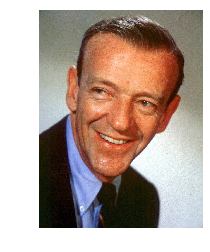

In [141]:
user_picture_pixels = obtain_image_pixels(user_picture_image_path)

plot_face(user_picture_pixels, is_array = True)

user_faces = get_all_faces(user_picture_pixels)

resized_faces = get_all_resized_faces(user_picture_pixels, dimensions = (160,160), margin = 40)

user_embeddings = []

for i in resized_faces:
    user_embeddings.append(make_a_prediction(i))

# Calculate Cosine Similarity

100%|██████████| 264533/264533 [00:02<00:00, 117042.59it/s]


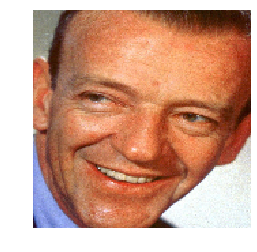

In [142]:
face_num = 0

#Cosine Similarity from Danushka
def findCosineSimilarity(source_representation, test_representation=user_embeddings[face_num]):
    try:
        cos = np.dot(source_representation, test_representation) / (np.sqrt(np.dot(source_representation, source_representation)) * np.sqrt(np.dot(test_representation, test_representation)))
        return cos
    except:
        return 10 #assign a large value in exception. similar faces will have small value.
    
photo_df['cosine'] = photo_df['embeddings_fn'].progress_apply(findCosineSimilarity)

plot_face(resized_faces[face_num])

# Predict Person

In [143]:
photo_df = photo_df.sort_values(by = ['cosine'], ascending = False)
#plot_face(obtain_image_pixels(test_df.file_path[161231]), is_array = True)

0 . Deane Keller  ( 0.4770704209804535 )


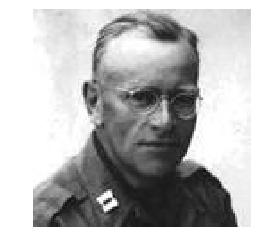

1 . Fred Astaire  ( 0.4639780819416046 )


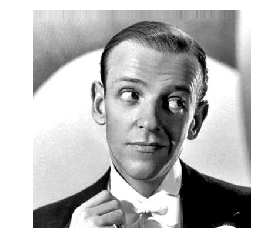

2 . Franco De Piccoli  ( 0.46288859844207764 )


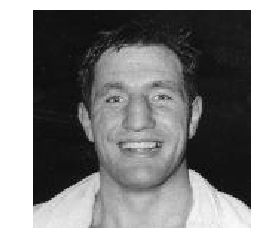

3 . Harvey Keitel  ( 0.45968958735466003 )


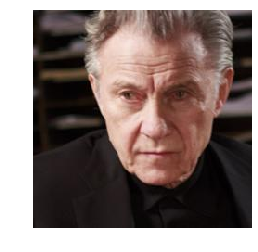

4 . James Spader  ( 0.4539538621902466 )


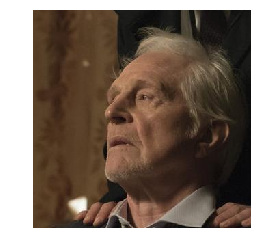

In [144]:
for i in range(0, 5):
    instance = photo_df.iloc[i]
    name = instance['name']
    distance = instance['cosine']
    img = cv2.imread(instance['file_path'])
    print(i,".",name," (",instance['cosine'],")")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

0 . Lance Bass  ( 0.607214629650116 )


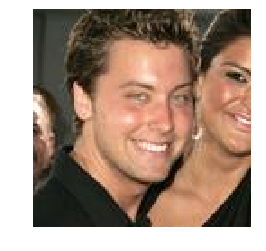

1 . Alejandro Sanz  ( 0.5995051860809326 )


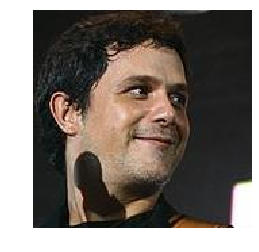

2 . Christina Hendricks  ( 0.5985721945762634 )


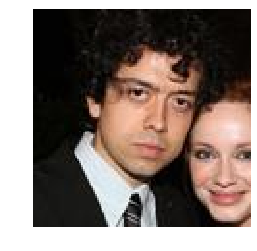

3 . Geoffrey Arend  ( 0.5985721945762634 )


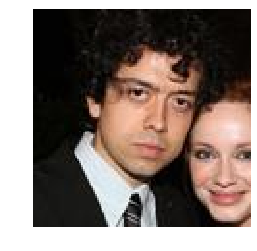

4 . Jay Duplass  ( 0.5965913534164429 )


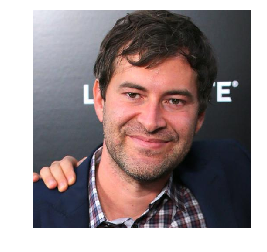

In [73]:
photo_df.file_path[23567]

'image_data/imdb_data/67/nm0000267_rm689801984_1935-10-1_2009.jpg'

In [71]:
photo_df.file_path[161433]

'image_data/imdb_data/69/nm1631269_rm3813848064_1997-2-10_2011.jpg'

4 . Geoffrey Arend  ( 0.5252185463905334 )


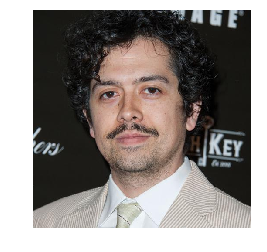

In [50]:
instancea = photo_df.loc[199367]
namea = instancea['name']
distancea = instance['cosine']
imga = cv2.imread(instancea['file_path'])
print(i,".",namea," (",instancea['cosine'],")")
plt.axis('off')
plt.imshow(cv2.cvtColor(imga, cv2.COLOR_BGR2RGB))
plt.show()

In [51]:
photo_df.loc[285514].file_path

'image_data/imdb_data/16/nm0376716_rm855607552_1975-5-3_2007.jpg'

In [52]:
photo_df.loc[199375].file_path

'image_data/imdb_data/09/nm0034309_rm855607552_1978-2-28_2007.jpg'

In [45]:
photo_df.head()

,name,dob,gender,photo_taken,age_when_taken,file_path,face_location,face_score,embeddings_fn,cosine
105616,Lance Bass,1979-05-04,1.0,2004,25,image_data/imdb_data/26/nm0004726_rm1896716800...,[ 82.04339034 59.81301116 148.2025279 125.97...,3.723875,"[0.06535954, 0.67357457, 0.32781202, 0.1358425...",0.607215
360074,Alejandro Sanz,1968-12-18,1.0,2007,39,image_data/wiki_data/83/786283_1968-12-18_2007...,[170.13307914 110.39669827 258.85765046 199.12...,2.541595,"[-0.19712505, -0.97042346, 0.05923114, -0.3750...",0.599505
285514,Christina Hendricks,1975-05-03,0.0,2007,32,image_data/imdb_data/16/nm0376716_rm855607552_...,[ 83.81261369 62.99296027 145.73757396 124.91...,4.574460,"[0.45079055, 0.65599966, 0.8626557, 1.647188, ...",0.598572
199375,Geoffrey Arend,1978-02-28,1.0,2007,29,image_data/imdb_data/09/nm0034309_rm855607552_...,[ 83.81261369 62.99296027 145.73757396 124.91...,4.574460,"[0.45079055, 0.65599966, 0.8626557, 1.647188, ...",0.598572
224192,Jay Duplass,1973-03-07,1.0,2014,41,image_data/imdb_data/31/nm0243231_rm472237824_...,[388.36660102 247.88710974 702.39745641 561.91...,5.047210,"[0.3881223, 1.4115636, 0.19446293, -0.23818108...",0.596591


In [44]:

photo_df[photo_df['name'].str.contains("Geoffrey Arend", case=False)]

,name,dob,gender,photo_taken,age_when_taken,file_path,face_location,face_score,embeddings_fn,cosine
199375,Geoffrey Arend,1978-02-28,1.0,2007,29,image_data/imdb_data/09/nm0034309_rm855607552_...,[ 83.81261369 62.99296027 145.73757396 124.91...,4.574460,"[0.45079055, 0.65599966, 0.8626557, 1.647188, ...",0.598572
199367,Geoffrey Arend,1978-02-28,1.0,2014,36,image_data/imdb_data/09/nm0034309_rm452447744_...,[ 324.78512109 486.15368164 1048.89564355 121...,4.422272,"[0.3925847, 0.45412102, -0.25006425, 0.2216901...",0.525219
199370,Geoffrey Arend,1978-02-28,1.0,2008,30,image_data/imdb_data/09/nm0034309_rm547591168_...,[297 161 368 232],3.461589,"[0.57082844, 1.1647332, -1.664345, 0.5076383, ...",0.433488
199353,Geoffrey Arend,1978-02-28,1.0,2014,36,image_data/imdb_data/09/nm0034309_rm3002385920...,[ 821.248 198.656 1114.112 491.52 ],5.661206,"[1.1087989, -0.28227663, 0.41373673, 0.4131948...",0.426996
199344,Geoffrey Arend,1978-02-28,1.0,2011,33,image_data/imdb_data/09/nm0034309_rm1181398528...,[ 95.3160647 112.4644401 171.48375401 188.63...,2.726416,"[-0.55913115, 1.2058929, -0.06077604, -0.21307...",0.410223
199366,Geoffrey Arend,1978-02-28,1.0,2007,29,image_data/imdb_data/09/nm0034309_rm420061184_...,[ 880.04482051 212.76723692 1194.07567589 52...,5.505590,"[0.3232168, 0.09776025, -0.09149674, 0.3636945...",0.410204
199369,Geoffrey Arend,1978-02-28,1.0,2010,32,image_data/imdb_data/09/nm0034309_rm539001088_...,[ 79.29324245 34.97204357 123.11444133 78.79...,3.474418,"[-0.06963825, -0.6373198, -0.34458822, 0.31017...",0.376622
361982,Geoffrey Arend,1978-02-28,1.0,2011,33,image_data/wiki_data/68/23748168_1978-02-28_20...,[ 47.142 78.246 186.624 217.728],4.699427,"[0.16607499, -0.28391373, -0.58089685, 0.44357...",0.368493
199355,Geoffrey Arend,1978-02-28,1.0,2011,33,image_data/imdb_data/09/nm0034309_rm3138764032...,[225.78 205.332 286.272 265.824],1.540144,"[0.521618, 1.1735561, 0.41956392, 0.01051764, ...",0.350973
199360,Geoffrey Arend,1978-02-28,1.0,2011,33,image_data/imdb_data/09/nm0034309_rm3721115904...,[174.76832705 232.7397694 347.82865409 405.80...,4.073335,"[-1.4650456, -0.4348028, -0.04762281, 0.020607...",0.344610


# Create an Average Cosine Column

In [ ]:
#avg_cos_dict = photo_df.groupby(['name']).cosine.mean().to_dict()

In [ ]:
#test = photo_df.copy()

In [ ]:
#name_cos_list = []

#for x in test.itertuples():
    
#    name_cos_list.append(avg_cos_dict[x[1]])

In [ ]:
#test['avg_artist_cos'] = name_cos_list

In [ ]:
#test[0:100].groupby(['name']).max()

In [ ]:
#test[test['name'].str.contains("loë gra", case=False)].cosine.mean()

In [ ]:
#test = test.sort_values(by = ['avg_artist_cos'], ascending = False)

In [ ]:
#katy_df = test[test['name'].str.contains("katy perry", case=False)]
#katy_df.sort_values(by = ['cosine'], ascending = False)

In [ ]:
plot_face(obtain_image_pixels(test_df.file_path[258546]), is_array = True)

In [ ]:
test.head(100)

In [ ]:
plot_face(obtain_image_pixels(test_df.file_path[342611]), is_array = True)

In [ ]:
plot_face(obtain_image_pixels(test_df.file_path[358431]), is_array = True)

In [ ]:
test[test['name'].str.contains("Katy Perry", case=False)]

In [ ]:
test.head(20)

In [ ]:
#photo_df[photo_df['name'].str.contains("loë gra", case=False)]

# Cosine Test 1 - Sefik Ilkin Serengil

In [ ]:
test_df = photo_df.copy()

In [ ]:
test_df.head()

In [ ]:
tqdm.pandas()

def findCosineSimilarity(source_representation, test_representation=user_embeddings[0]):
    try:
        a = np.matmul(np.transpose(source_representation), test_representation)
        b = np.sum(np.multiply(source_representation, source_representation))
        c = np.sum(np.multiply(test_representation, test_representation))
        return (a / (np.sqrt(b) * np.sqrt(c)))
    except:
        return 10 #assign a large value in exception. similar faces will have small value.

test_df['Sefik_cosine'] = test_df['embeddings_fn'].progress_apply(findCosineSimilarity)


In [ ]:
test_df.head()

In [ ]:
test_df.describe()

# Cosine Test 2 - Danushka

In [ ]:
def findCosineSimilarity(source_representation, test_representation=user_embeddings[0]):
    try:
        cos = np.dot(source_representation, test_representation) / (np.sqrt(np.dot(source_representation, source_representation)) * np.sqrt(np.dot(test_representation, test_representation)))
        return cos
    except:
        return 10 #assign a large value in exception. similar faces will have small value.

test_df['cosDanushka'] = test_df['embeddings_fn'].progress_apply(findCosineSimilarity)

In [ ]:
test_df.head()

# Cosine Test 3 - Scikit learn Cosine

In [ ]:
def user_cosine_similarity(database_embedding, user_embedding):

    user_embedding = user_embedding.reshape(-1,1)

    database_embedding = database_embedding.reshape(-1,1).T

    cos_sim = cosine_similarity(database_embedding, user_embeddings)

    return cos_sim[0][0]

In [ ]:
cosine_sim = np.array([])

for x in test_df.itertuples():
    
    cosine_sim = np.append(cosine_sim, user_cosine_similarity(x[-3], user_embeddings[0]))

In [ ]:
test_df['scikit_cosine_similarity'] = cosine_sim
test_df.head()

# Cosine Test 4 - Cos Numpy Lin 

In [ ]:
user_embeddings[0]

In [ ]:
def findCosineSimilarity(data_embedding, user_embedding=user_embeddings[0]):
    try:
        return np.dot(data_embedding, user_embedding) / (np.linalg.norm(data_embedding) * np.linalg.norm(user_embedding)) 
    except:
        return 10 #assign a large value in exception. similar faces will have small value.

test_df['numpy_lin_cos'] = test_df['embeddings_fn'].progress_apply(findCosineSimilarity)

In [ ]:
test_df.head()

# Most similar To User

In [ ]:
test_df.sort_values(by=['cosDanushka'], ascending = False)

In [ ]:
#photo_df[photo_df['name'].str.contains("john mayer", case=False)]

In [ ]:
plot_face(obtain_image_pixels(test_df.file_path[212307]), is_array = True)

In [ ]:
cosine_sim = np.array([])

for x in test_df.itertuples():
    
    cosine_sim = np.append(cosine_sim, user_cosine_similarity(x[-1], user_embeddings[0]))

In [ ]:
cosine_sim

In [ ]:
test_df[test_df['distance'] == 10]

In [ ]:
cosine_sim = []

for x in test_df.itertuples():
    
    cosine_sim.append(findCosineSimilarity(x[-1], user_embeddings[0]))
#     cosine_sim = np.append(cosine_sim, user_cosine_similarity(x[-1], user_embeddings[0]))

In [ ]:
def user_cosine_similarity(database_embedding, user_embedding):
#     print(type(np.reshape(database_embedding, (-1,1))))
#     print(database_embedding.shape)
    
    
#     print(type(user_embedding.reshape(-1,1)))
#     print(user_embedding.shape)
    user_embedding = user_embedding.reshape(-1,1)
#     print(user_embedding.shape)
    database_embedding = database_embedding.reshape(-1,1).T
#     print(database_embedding.shape)

    cos_sim = cosine_similarity(database_embedding, user_embeddings)
#     print(cos_sim[0][0])
    
#     print(type(cos_sim))
    return cos_sim[0][0]

In [ ]:
cosine_sim = []

for x in test_df.itertuples():
    
    cosine_sim.append(user_cosine_similarity(x[-1], user_embeddings[0]))
#     cosine_sim = np.append(cosine_sim, user_cosine_similarity(x[-1], user_embeddings[0]))

In [ ]:
cosine_sim

In [ ]:
cosine_sim

In [ ]:
test_df

In [ ]:
test_df['cosine_sim'] = cosine_sim

In [ ]:
test_df

In [ ]:
def user_cosine_similarity(database_embedding, user_embedding):
    
    try:
        return cosine_similarity(database_embedding, user_embedding)
    except:
        return np.nan


In [ ]:
test['user_cosine_similarity'] = test['embeddings_fn'].apply(lambda x: user_cosine_similarity(user_embeddings[0], x))
test.head()